Import Required Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load and Display the Image

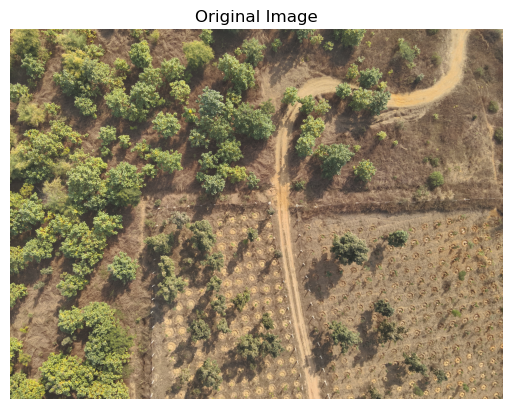

In [3]:
# Load the image using OpenCV
image = cv2.imread(r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing\2_post-SW\DJI_20241229133646_0201_V.JPG")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display purposes

# Display the original image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()


 Increase Contrast of the Original Image

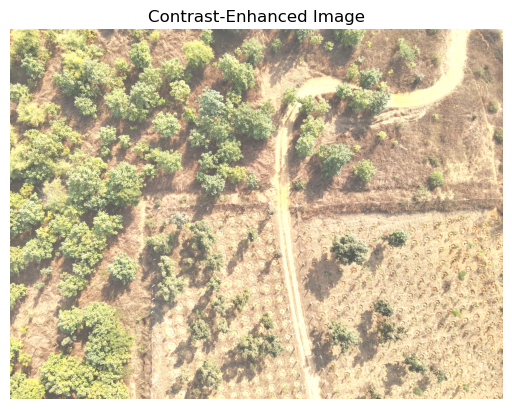

In [9]:
# Increase contrast using cv2.convertScaleAbs
alpha = 1.3  # Contrast control (1.0-3.0)
beta = 30    # Brightness control (0-100)

enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Convert to RGB for display
enhanced_image_rgb = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB)

# Display the enhanced image
plt.imshow(enhanced_image_rgb)
plt.title("Contrast-Enhanced Image")
plt.axis("off")
plt.show()


Define the Green Color Range


In [10]:
# Convert the contrast-enhanced image to HSV
hsv_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2HSV)

# Define an extended range for light green
lower_green = np.array([30, 25, 25])  # Lower H, S, V thresholds for light green
upper_green = np.array([85, 255, 255])  # Upper H, S, V thresholds for dark green


Create a Mask for Green Areas

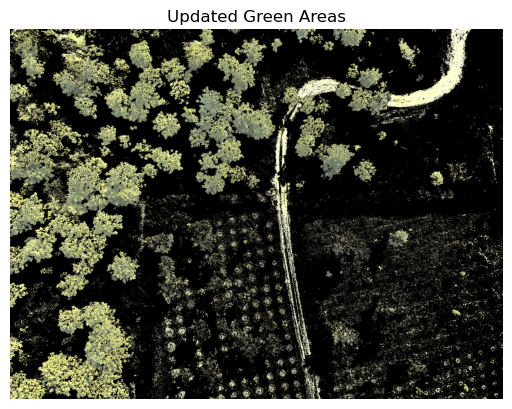

In [11]:
# Create a mask for green areas
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Apply the mask to the enhanced image
green_parts = cv2.bitwise_and(enhanced_image_rgb, enhanced_image_rgb, mask=mask)

# Display the green areas
plt.imshow(green_parts)
plt.title("Updated Green Areas")
plt.axis("off")
plt.show()


 Calculate the Green Area

In [13]:
# Count green pixels in the updated mask
green_pixel_count = cv2.countNonZero(mask)

# Calculate the percentage of green area
total_pixel_count = enhanced_image.shape[0] * enhanced_image.shape[1]
green_area_percentage = (green_pixel_count / total_pixel_count) * 100

print(f"Updated Total Green Area: {green_pixel_count} pixels")
print(f"Updated Percentage of Green Area: {green_area_percentage:.2f}%")


Updated Total Green Area: 2910320 pixels
Updated Percentage of Green Area: 24.25%


Optional: Overlay Green Mask on Original Image

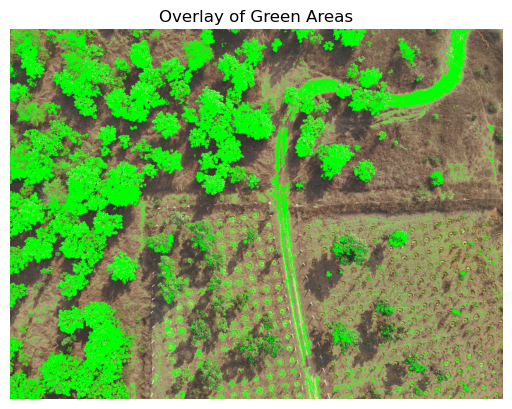

In [14]:
# Overlay the mask on the original image for visualization
overlay = image_rgb.copy()
overlay[mask > 0] = [0, 255, 0]  # Highlight green areas with bright green

# Display the overlay image
plt.imshow(overlay)
plt.title("Overlay of Green Areas")
plt.axis("off")
plt.show()
